# Tutorial of Python library for Large-scale map matching algorithm

1. requirements
> we assume that you have a hdf5 data file as a taxidata. and the library taxidata is installed.


In [27]:
import taxidata as td
import numpy as np
import matplotlib.pyplot as plt

## 1. Data load

### Taxi Data load

load the taxi data from hdf5

In [2]:
Tdset = td.Dataset("../notebook/2013-12-11.hdf5")

In [3]:
Tdset.fields

['ang', 'lat', 'lon', 'psg', 'valid', 'vel', 'x', 'y', 'z']

In [4]:
len(Tdset)

86349371

In [5]:
td_array_single = Tdset.get_array(num = 1, random = False, fields=['x','y','psg','vel'],position=('x','y'))

1 taxis founded in data with given condition.


(306835.35, 336879.65, 4150415.75, 4160563.25)

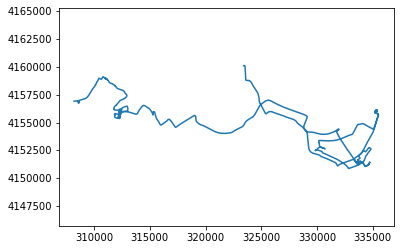

In [6]:
plt.plot(*td_array_single.pos.T,'-', markersize = 1)
plt.axis('equal')

`td.district`는 서울시의 구별 위치를 담고 있다. 
(x,y)로 둘러싸인 도형으로 이루어져 있고 각각 x, y로 구성되어있다.

In [39]:
td.district.get_list()

{'도봉구': 11320,
 '은평구': 11380,
 '동대문구': 11230,
 '동작구': 11590,
 '금천구': 11545,
 '구로구': 11530,
 '종로구': 11110,
 '강북구': 11305,
 '중랑구': 11260,
 '강남구': 11680,
 '강서구': 11500,
 '중구': 11140,
 '강동구': 11740,
 '광진구': 11215,
 '마포구': 11440,
 '관악구': 11620,
 '서초구': 11650,
 '성북구': 11290,
 '노원구': 11350,
 '송파구': 11710,
 '성동구': 11200,
 '서대문구': 11410,
 '양천구': 11470,
 '영등포구': 11560,
 '용산구': 11170}

구를 지정하는 방법은 구에 해당하는 id와 이름을 이용하여 지정할 수 있다

In [41]:
td.district('동대문구')   # set target district as 동대문구 

<district object set as 11230(동대문구)>

송파구


(306736.90906803677, 338946.9095712283, 4147689.0795264198, 4160693.091451123)

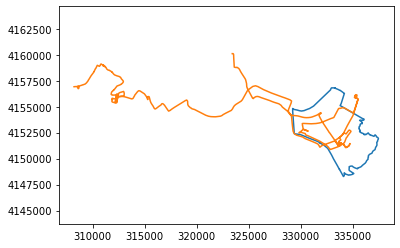

In [42]:
td.district[19]
print(td.district.name)
td.district.plot() # plot district boundary
plt.plot(*td_array_single.pos.T)
plt.axis('equal')

`td.district.raycast` is a function that checking whether given point is inside of polygon or not?

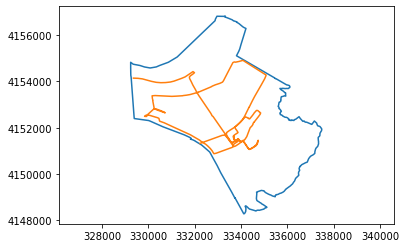

In [12]:
td.district.plot()
plt.axis('equal')
plt.plot(*td_array_single.pos[td.district.raycast(td_array_single.pos)].T,'-', markersize = 1)

In [13]:
td_arrays = Tdset.get_array(num = 10, random = False, fields=['x','y','psg','vel'],position=('x','y'))

10 taxis founded in data with given condition.


taxi array에서 여러개의 id를 갖는 데이터를 추출시 `taxiarray.iterate_with('id')` 함수를 이용하여 각 id 별로 데이터에 접근할 수 있다.

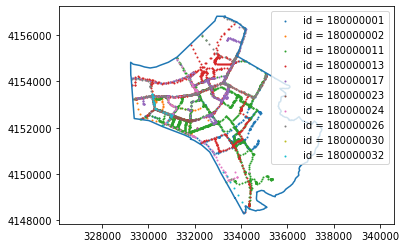

In [22]:
td.district.plot()
plt.axis('equal')
for tid, taxi in td_arrays.iterate_with('id'):
    plt.scatter(*taxi.pos[td.district.raycast(taxi.pos)].T,s = 1, label = f"id = {tid}")
plt.legend()

### Network loads

택시 데이터를 분석할 때는 네트워크 위에서 움직이는 택시를 분석하는 것도 좋은 방법이다. 
네트워크 관련 라이브러리는 `Networkx`를 이용하였다.

In [30]:
import networkx as nx

도로네트워크에서 이용할 만한 함수들을 위해 RoadNetwork() 라는 class를 만들어두었다. 

In [23]:
Seoul = td.load_seoul()

도로네트워크 각 노드의 위치는 `pos` 함수를 이용하여 딕셔너리와 유사한 형태로 구할 수 있다. 

In [43]:
pos = dict(Seoul.pos)
node, pos = list(pos.keys()), list(pos.values())

네트워크에서도 마찬가지로 `td.district.raycast` 함수를 이용하여 해당 구의 네트워크를 추출할 수 있다.

<district object set as 11230(동대문구)>


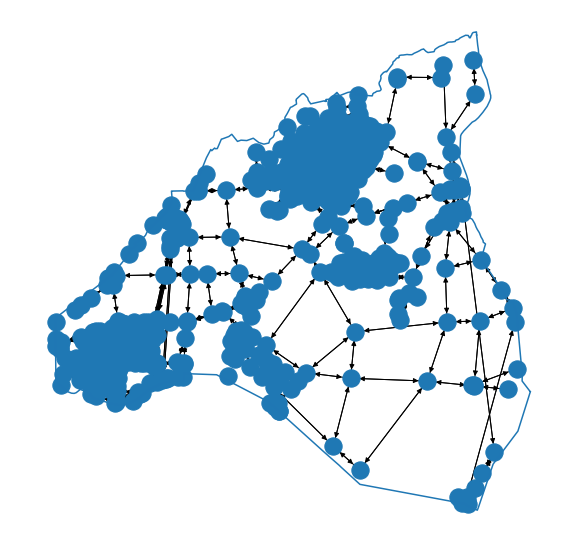

In [38]:
plt.figure(figsize = [10,10])
print(td.district[2])
td.district.plot()
nx.draw(Seoul.subgraph(np.array(node)[td.district.raycast(pos)]), pos = Seoul.pos)

## 2. k segment 

k segment란 길이가 k를 넘지않는 임의의 도로(path)를 칭한다. 여러 제한 조건과 자세한 정의는 논문 참조바람

### k segment generation